In [ ]:
#Task1 : Stock Market Prediction And Forecasting Using Stacked LSTM
Name - Akshanshu Bharti
What is LSTM ?
Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture,
[1] used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. 
It can process not only single data points (such as images), but also entire sequences of data (such as speech or video). 
For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition,
[2] speech recognition[3][4] and anomaly detection in network traffic or IDSs (intrusion detection systems).

In [8]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


Text(0, 0.5, 'Close')

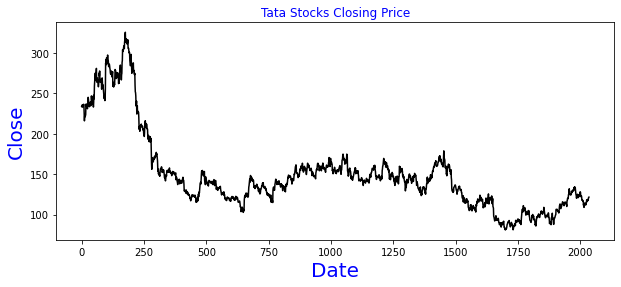

In [12]:
plt.figure(figsize = (10,4))
plt.title('Tata Stocks Closing Price', color='Blue')
plt.plot(data['Close'], color='Black')
plt.xlabel('Date',fontsize=20, color='Blue')
plt.ylabel('Close',fontsize=20, color='Blue')

In [13]:
data_close = data.reset_index()['Close']
data_close.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler 
import math 
import seaborn as sb 
from sklearn.metrics import mean_squared_error

In [15]:
scaler = MinMaxScaler(feature_range = (0, 1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1, 1))
data_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [17]:
#Training data 85 % and Testing data 15%
train_size = int(len(data_close) * 0.85)
test_size = len(data_close) - train_size
train_data, test_data = data_close[0 : train_size, :], data_close[train_size : len(data_close), : 1]
train_size, test_size

(1729, 306)

In [18]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.02920752],
       [0.02328431],
       [0.01919935]])

In [ ]:
# The above data is related to time series Dataset's

In [25]:
def create_dataset(dataset, time_step = 1):
    X_data, Y_data = [], []
    for i in range(len(dataset) - time_step - 1):
	    a = dataset[i : (i + time_step), 0] 
	    X_data.append(a)
	    Y_data.append(dataset[i + time_step, 0])
    return np.array(X_data), np.array(Y_data)

In [26]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [27]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1628, 100) (1628,)
(205, 100) (205,)


In [28]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [39]:
!pip install keras
!pip install tensorflow
from keras.models import Sequential 
from keras.layers import Dense, LSTM 

In [38]:
# Now tarting LSTM Model
lst = Sequential()
lst.add(LSTM(50,return_sequences = True, input_shape = (100, 1)))
lst.add(LSTM(50, return_sequences = True))
lst.add(LSTM(50))
lst.add(Dense(1))
lst.compile(loss = 'mean_squared_error', optimizer='adam')

In [41]:
lst.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [42]:
lst.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
26/26 [==============================] - 42s 664ms/step - loss: 0.0200 - val_loss: 0.0027
Epoch 2/100
26/26 [==============================] - 11s 433ms/step - loss: 0.0020 - val_loss: 5.4376e-04
Epoch 3/100
26/26 [==============================] - 11s 434ms/step - loss: 0.0015 - val_loss: 4.6883e-04
Epoch 4/100
26/26 [==============================] - 11s 433ms/step - loss: 0.0014 - val_loss: 4.3477e-04
Epoch 5/100
26/26 [==============================] - 11s 432ms/step - loss: 0.0013 - val_loss: 4.1310e-04
Epoch 6/100
26/26 [==============================] - 11s 435ms/step - loss: 0.0014 - val_loss: 4.1904e-04
Epoch 7/100
26/26 [==============================] - 11s 435ms/step - loss: 0.0011 - val_loss: 3.8814e-04
Epoch 8/100
26/26 [==============================] - 12s 446ms/step - loss: 0.0011 - val_loss: 3.9095e-04
Epoch 9/100
26/26 [==============================] - 11s 435ms/step - loss: 9.7835e-04 - val_loss: 3.8275e-04
Epoch 10/100
26/26 [==========================

In [47]:
train_predict = lst.predict(X_train)
test_predict = lst.predict(X_test)

7/7 [==============================] - 1s 108ms/step


In [ ]:
# The avove data shows the 1 and 2 prediction 

In [48]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

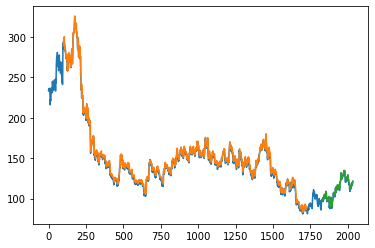

In [49]:
look_back = 100
train_num_pyredict_plot = np.empty_like(data_close)
train_num_pyredict_plot[:, :] = np.nan
train_num_pyredict_plot[look_back : len(train_predict) + look_back, :] = train_predict
test_predict_plot = np.empty_like(data_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(data_close) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(data_close))
plt.plot(train_num_pyredict_plot)
plt.plot(test_predict_plot)
plt.show()


In [ ]:
Finally the concuslion done .